In [1]:
import sys
sys.path.append("../")
import tensorflow as tf
import h5py, os, yaml
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# !pip install https://github.com/p-koo/tfomics/tarball/master
import tfomics
from test_to_bw_fast import read_model, get_config
import pandas as pd
import matplotlib.patches as patches
from tensorflow import keras
import plotly.express as px
import tfr_evaluate, util
import subprocess
import explain
from scipy.stats import pearsonr
from tqdm import tqdm
import embed

In [2]:
config_collection = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/binloss_basenji.csv')
run_paths =[ '../' + np.unique(config_collection[(config_collection['loss_fn']=='poisson')
                                       &(config_collection['bin_size']==32)]['run_dir'])[0]]
run_paths.append('../paper_runs/new_models/base_res/run-20211022_141032-m1cjyb3z') # residual exp

In [46]:
# run_path = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_bizon/run-20210705_124947-5lmwz5d3' # 32
# config_collection = pd.read_csv('/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/model_evaluations/binloss_basenji.csv')
# run_path = 'paper_runs/basenji/binloss_basenji/run-20210920_075434-wilgxp1a'
# run_path = np.unique(config_collection[(config_collection['loss_fn']=='poisson') & (config_collection['bin_size']==32)]['run_dir'])[0]
layer_dict = {15:'residual block 1', 
              22:'residual block 2', 
              24:'last conv layer', 
              25:'BN before dense'}

aux_model_list = []
BIN_SIZES = []

for run_path in run_paths:
    model, bin_size = read_model(run_path, compile_model=False)
    aux_model_list.append(tf.keras.Model(inputs=model.inputs, outputs=model.layers[25].output))
    BIN_SIZES.append(bin_size)

In [44]:
tf.keras.Model(inputs=model.inputs, outputs=model.layers[-3].output).summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sequence (InputLayer)           [(None, 2048, 4)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 2048, 192)    14784       sequence[0][0]                   
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 2048, 192)    768         conv1d[0][0]                     
__________________________________________________________________________________________________
filter_activation (Activation)  (None, 2048, 192)    0           batch_normalization[0][0]        
____________________________________________________________________________________________

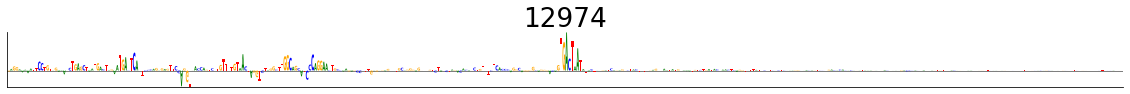

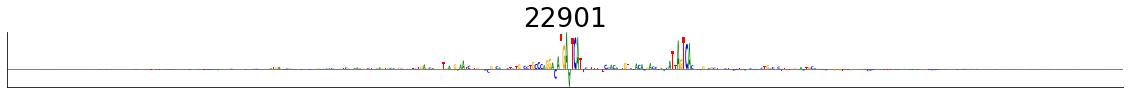

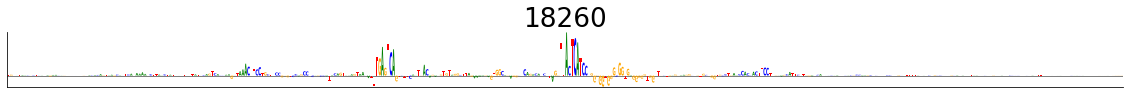

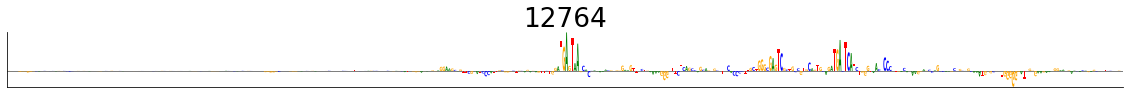

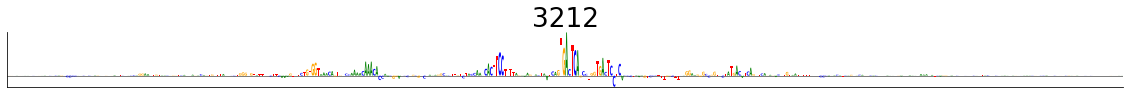

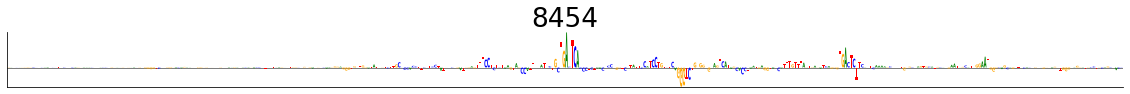

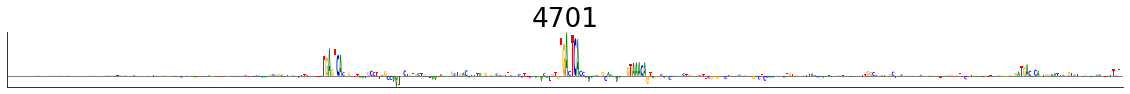

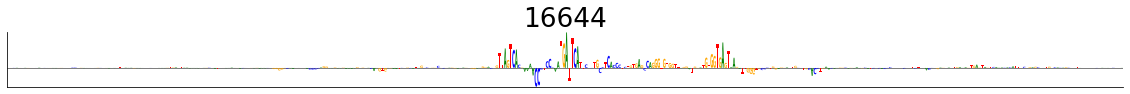

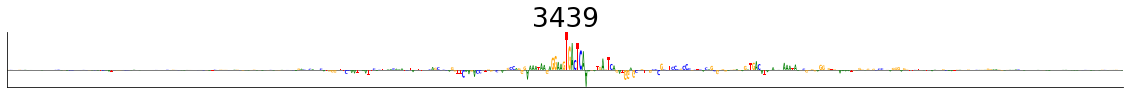

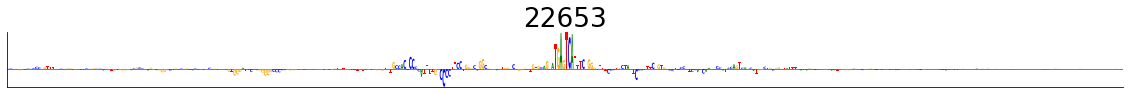

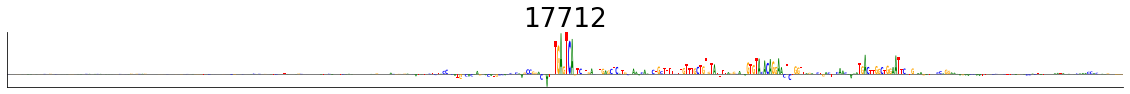

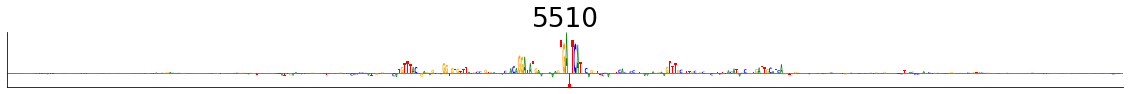

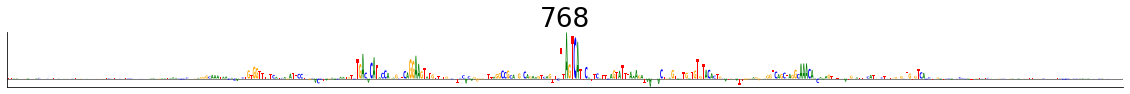

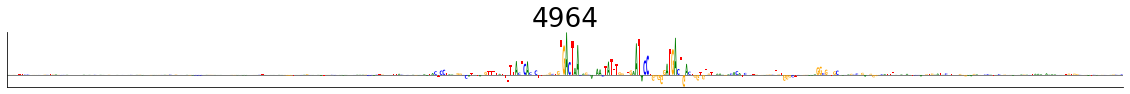

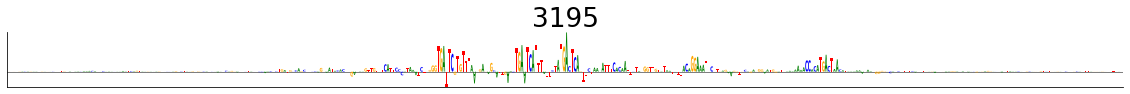

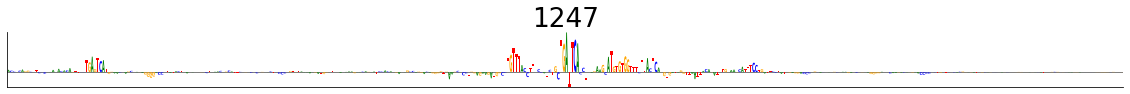

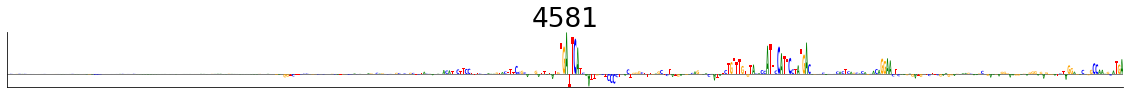

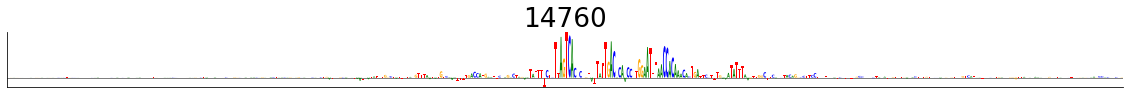

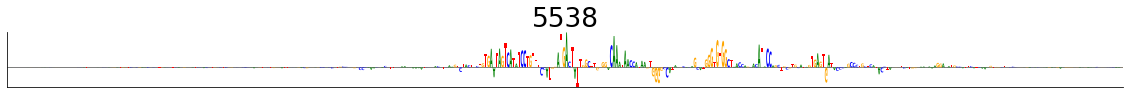

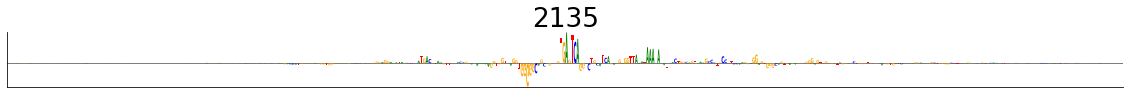

In [21]:
# left side sequences
explainer = explain.Explainer(model, class_index=cell_line)
selected_idx = [12974, 22901, 18260, 12764, 3212,
               8454, 4701, 16644, 3439, 22653,
               17712, 5510, 768, 4964, 3195,
               1247, 4581, 14760, 5538, 2135]
X_sample = filtered_X[selected_idx,:,:]
saliency_scores = explainer.saliency_maps(X_sample)

# plot attribution maps in a narrow range about max saliency value
explain.plot_saliency_logos(saliency_scores, X_sample, window=200, titles=selected_idx)

/home/shush/profile/QuantPred/explain.py:965: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



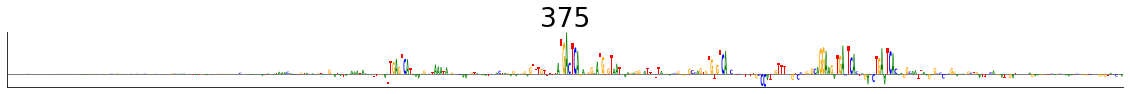

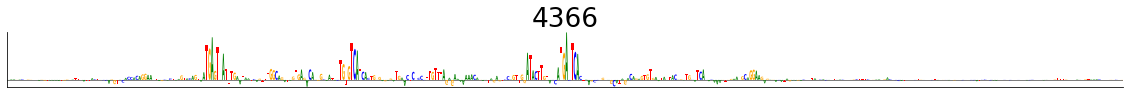

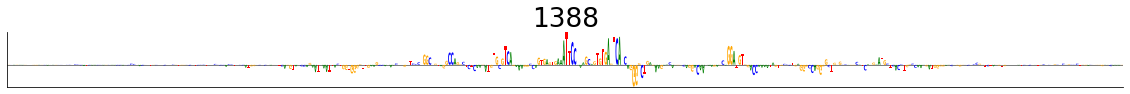

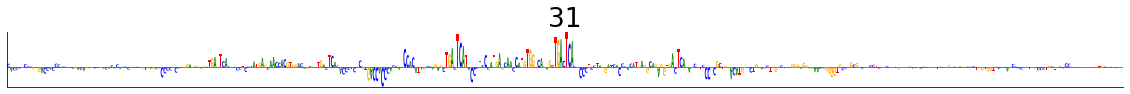

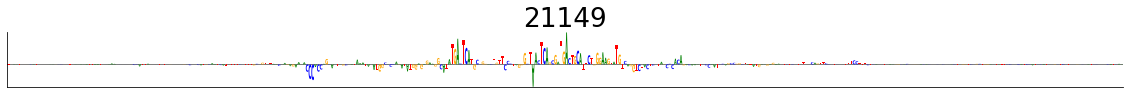

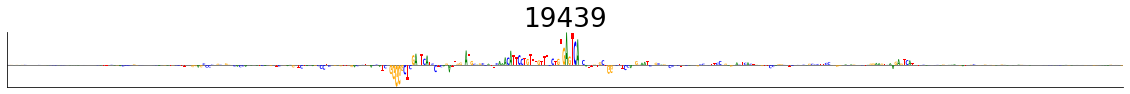

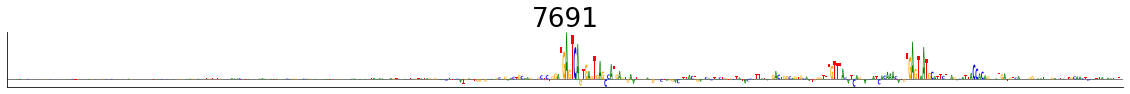

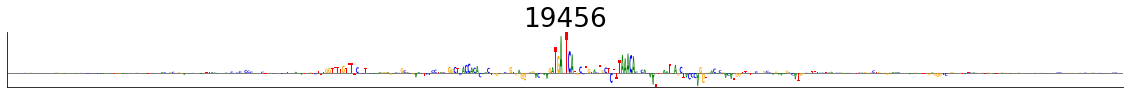

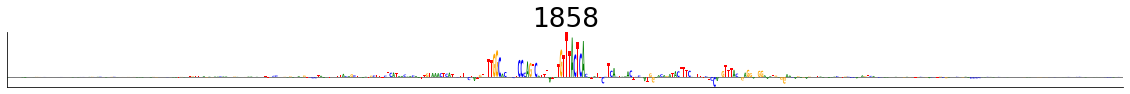

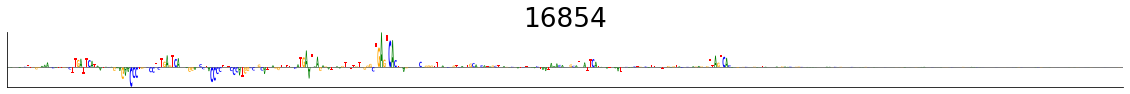

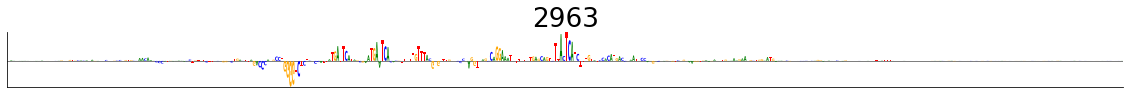

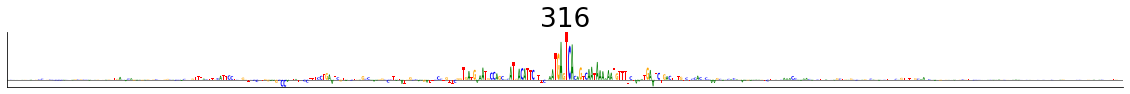

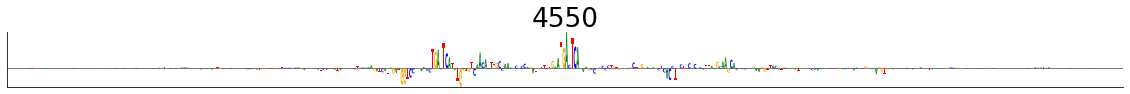

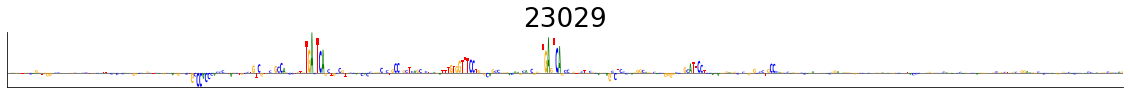

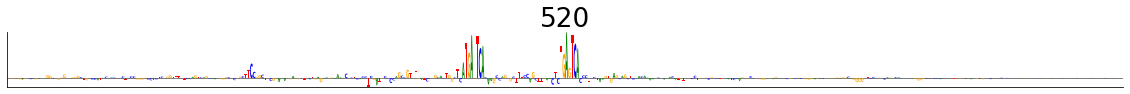

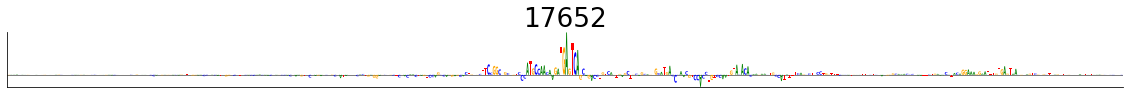

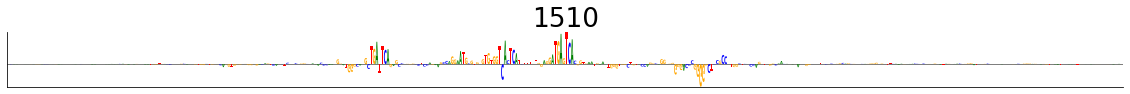

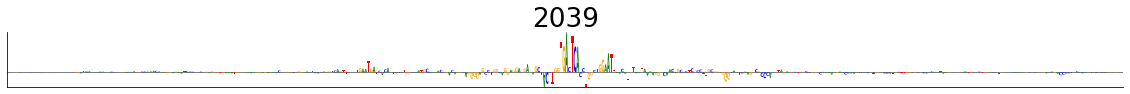

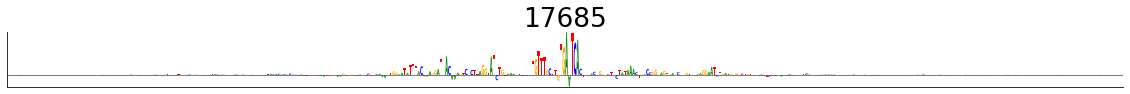

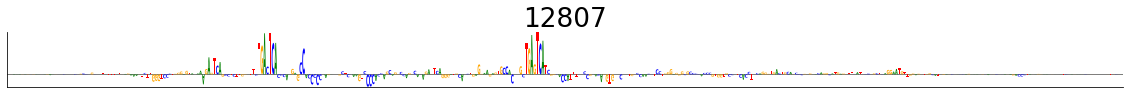

In [20]:
# right side sequences
explainer = explain.Explainer(model, class_index=cell_line)
selected_idx = [375, 4366, 1388, 31, 21149,
                19439, 7691, 19456, 1858, 16854, 
                2963, 316, 4550, 23029, 520,
               17652, 1510, 2039, 17685, 12807]
X_sample = filtered_X[selected_idx,:,:]
saliency_scores = explainer.saliency_maps(X_sample)

# plot attribution maps in a narrow range about max saliency value
explain.plot_saliency_logos(saliency_scores, X_sample, window=200, titles=selected_idx)

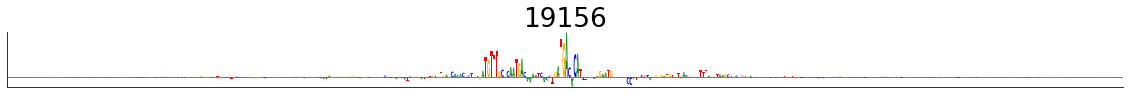

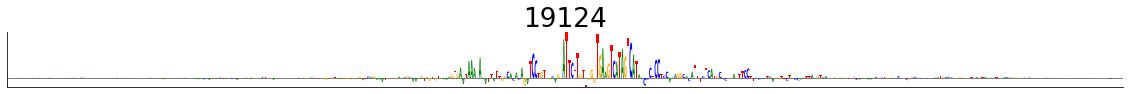

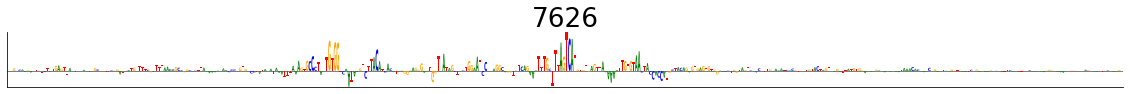

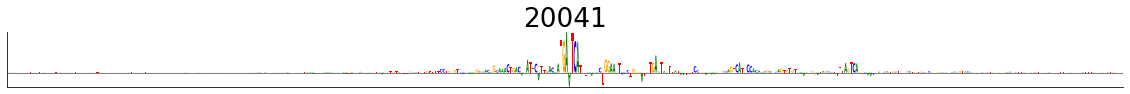

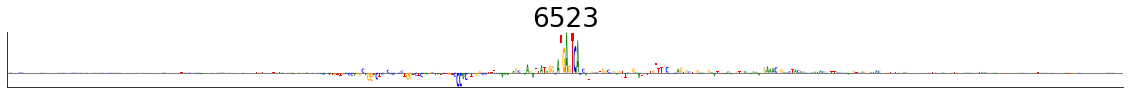

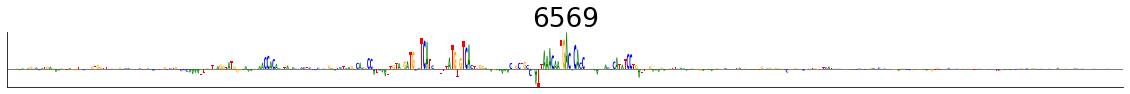

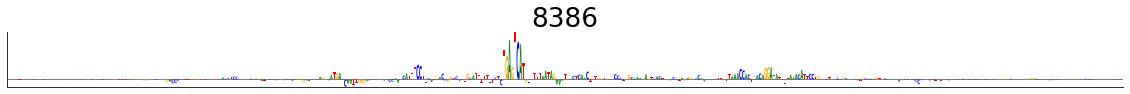

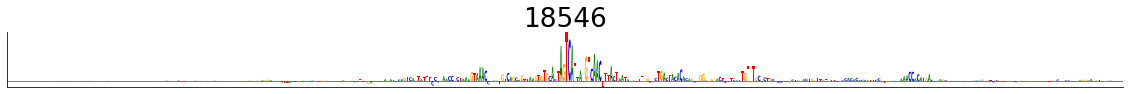

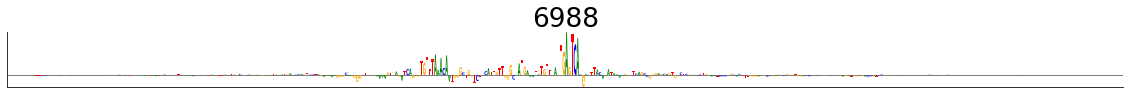

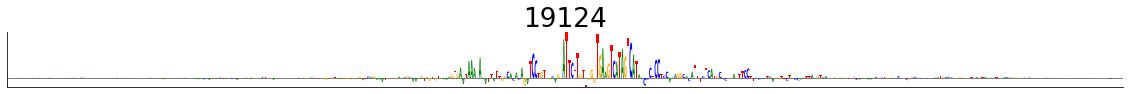

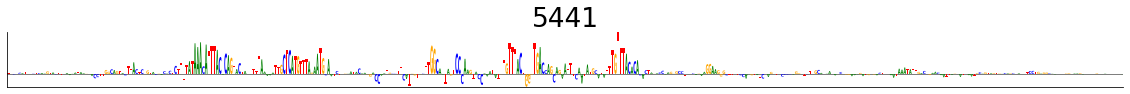

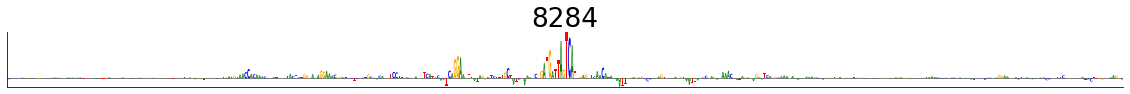

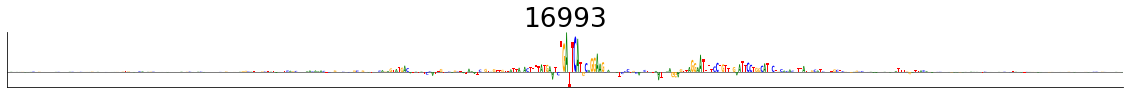

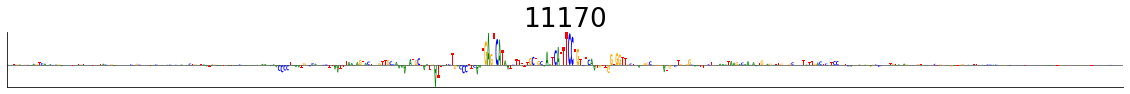

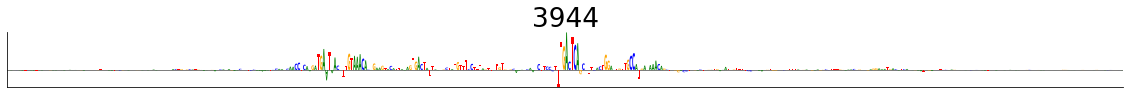

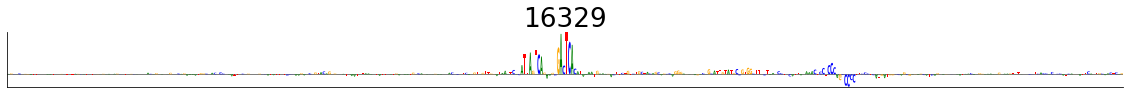

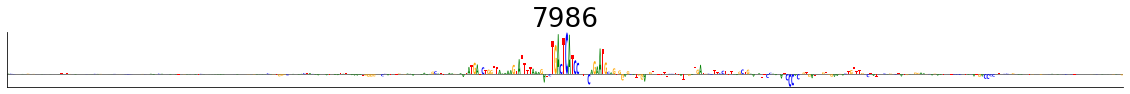

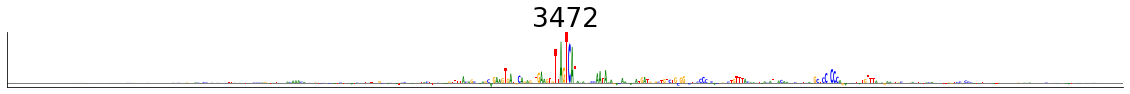

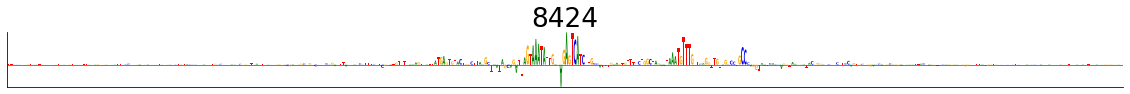

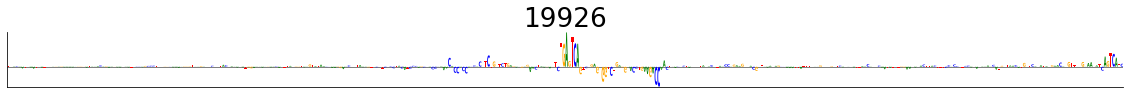

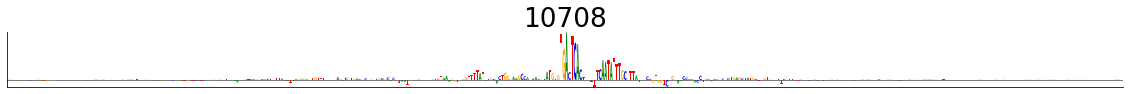

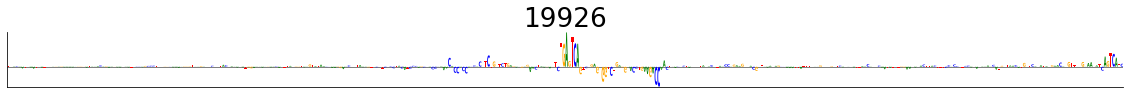

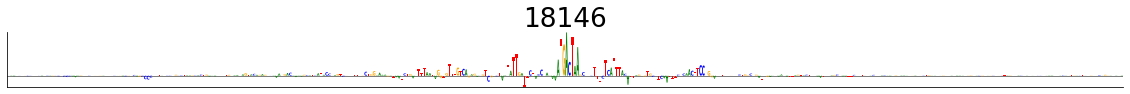

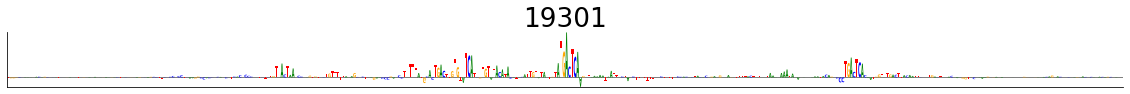

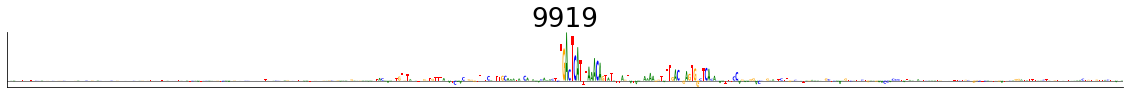

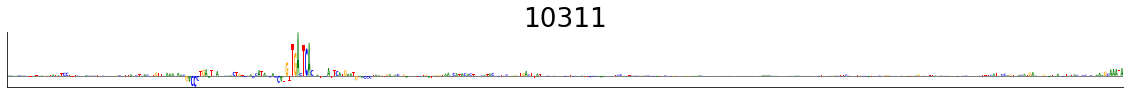

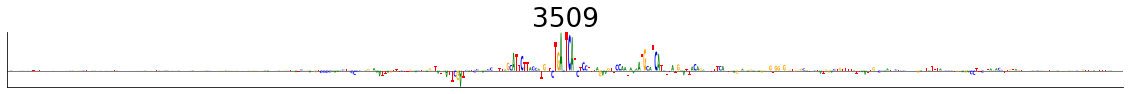

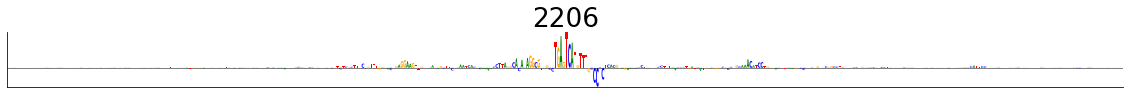

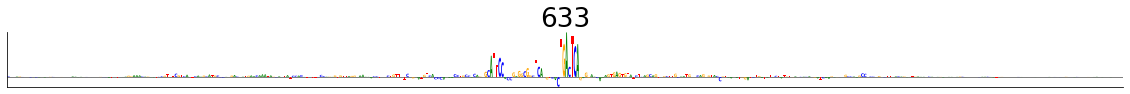

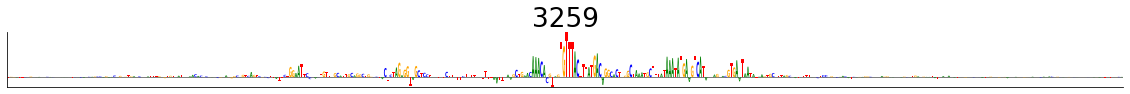

In [19]:
# blob sequences
explainer = explain.Explainer(model, class_index=cell_line)
selected_idx = [19156, 19124, 7626, 20041, 6523,
                6569, 8386, 18546, 6988, 19124, 
               5441, 8284, 16993, 11170, 3944,
               16329, 7986, 3472, 8424, 19926,
               10708, 19926, 18146, 19301, 9919,
               10311, 3509, 2206, 633, 3259]
X_sample = filtered_X[selected_idx,:,:]
saliency_scores = explainer.saliency_maps(X_sample)

# plot attribution maps in a narrow range about max saliency value
explain.plot_saliency_logos(saliency_scores, X_sample, window=200, titles=selected_idx)

/home/shush/profile/QuantPred/explain.py:942: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/shush/profile/QuantPred/explain.py:965: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



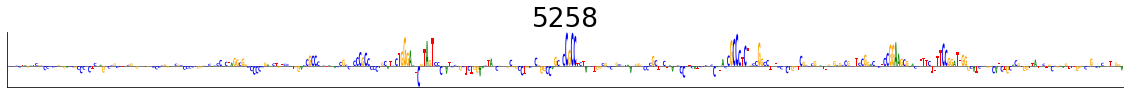

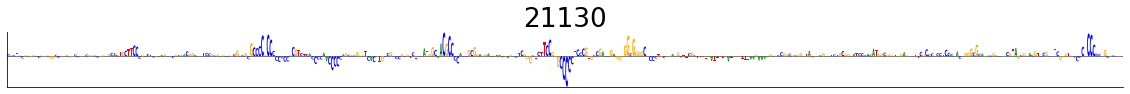

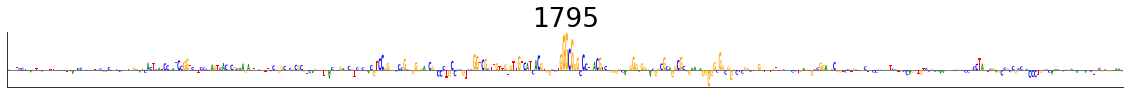

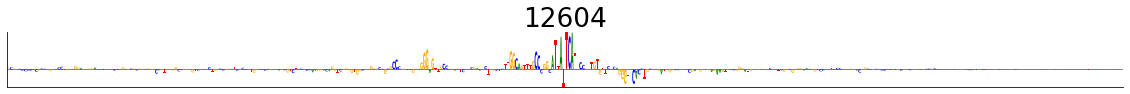

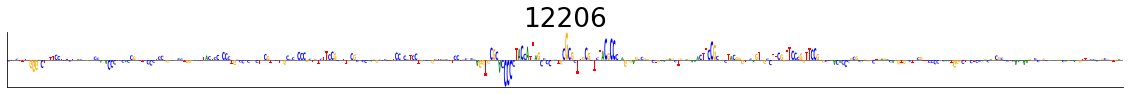

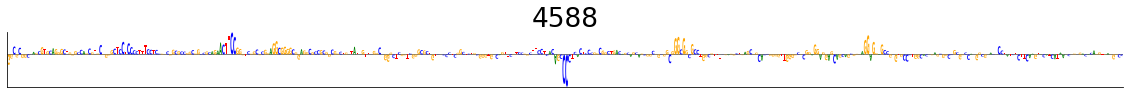

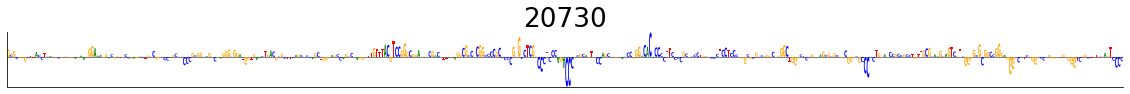

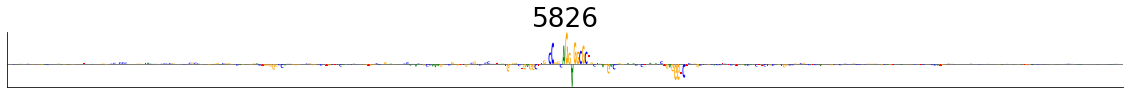

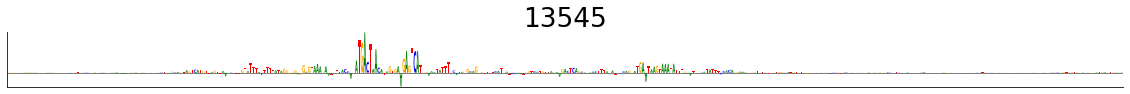

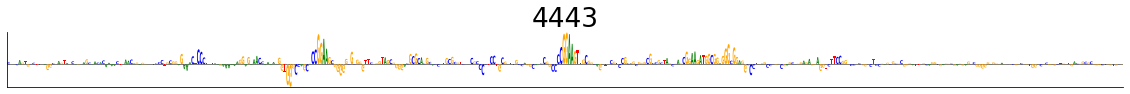

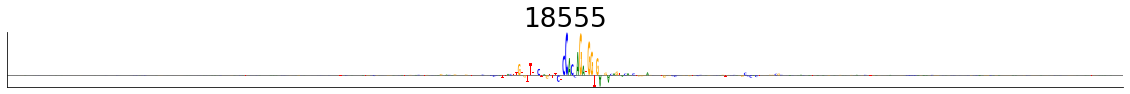

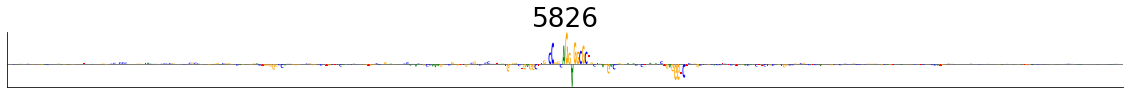

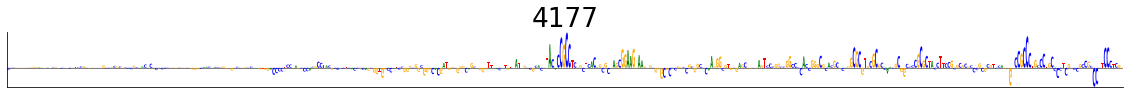

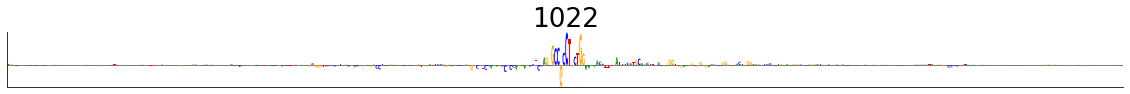

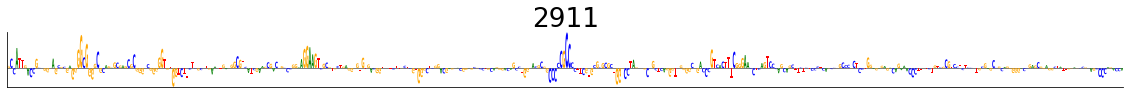

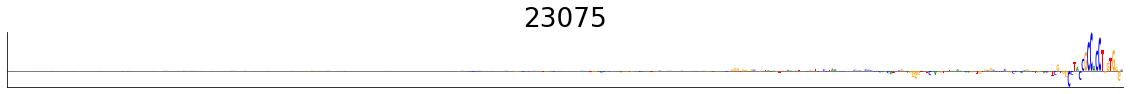

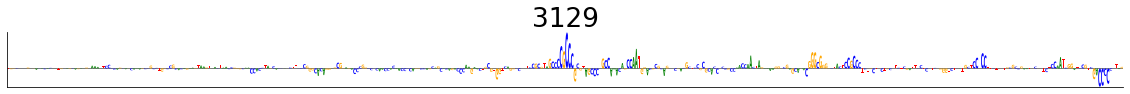

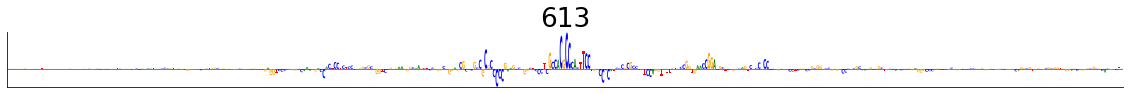

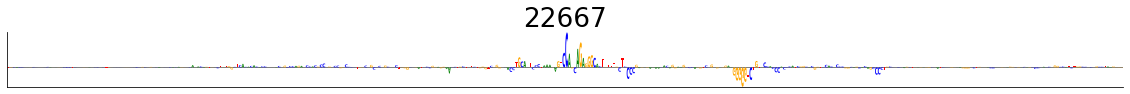

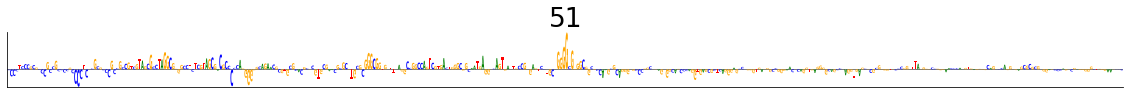

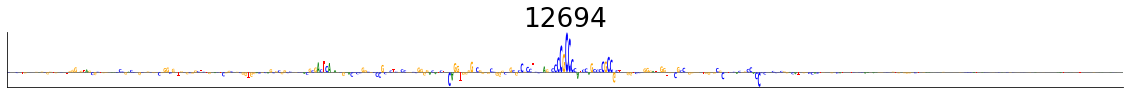

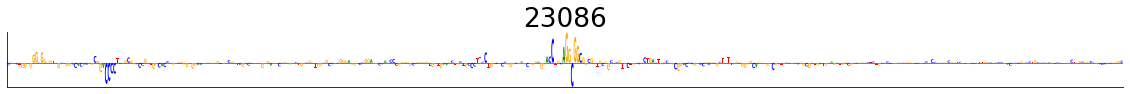

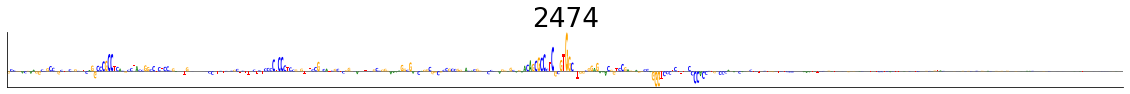

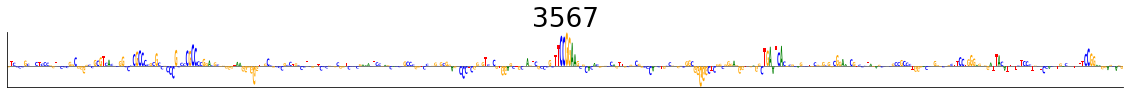

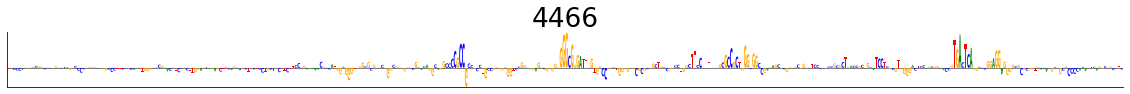

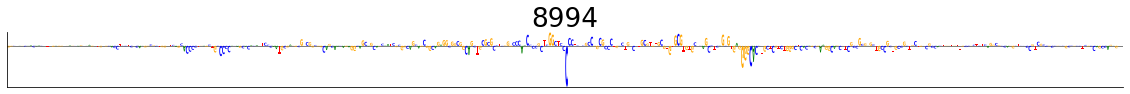

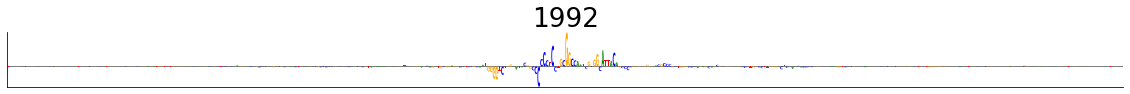

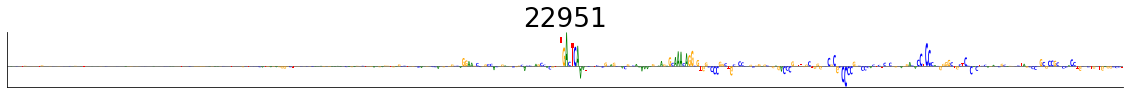

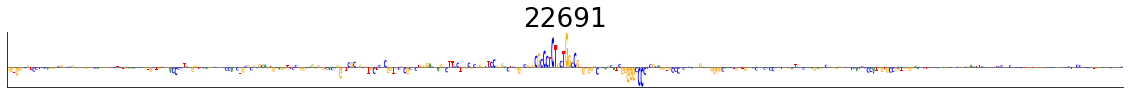

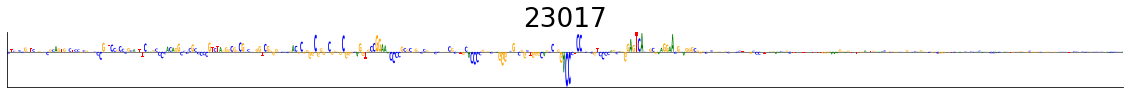

In [18]:
# top sequences
explainer = explain.Explainer(model, class_index=cell_line)
selected_idx = [5258, 21130, 1795, 12604, 12206,
                4588, 20730, 5826, 13545, 4443, 
                18555, 5826, 4177, 1022, 2911, 
               23075, 3129, 613, 22667, 51,
               12694, 23086, 2474, 3567, 4466,
               8994, 1992, 22951, 22691, 23017]
X_sample = filtered_X[selected_idx,:,:]
saliency_scores = explainer.saliency_maps(X_sample)

# plot attribution maps in a narrow range about max saliency value
explain.plot_saliency_logos(saliency_scores, X_sample, window=200, titles=selected_idx)

In [62]:
top_idx = [5258, 21130, 1795, 12604, 12206,
                4588, 20730, 5826, 13545, 4443, 
                18555, 5826, 4177, 1022, 2911, 
               23075, 3129, 613, 22667, 51,
               12694, 23086, 2474, 3567, 4466,
               8994, 1992, 22951, 22691, 23017]

top_points = embedding[top_idx]

left_idx = [12974, 22901, 18260, 12764, 3212,
               8454, 4701, 16644, 3439, 22653,
               17712, 5510, 768, 4964, 3195,
               1247, 4581, 14760, 5538, 2135]

left_points = embedding[left_idx]

right_idx = [375, 4366, 1388, 31, 21149,
                19439, 7691, 19456, 1858, 16854, 
                2963, 316, 4550, 23029, 520,
               17652, 1510, 2039, 17685, 12807]

right_points = embedding[right_idx]

blob_idx = [19156, 19124, 7626, 20041, 6523,
                6569, 8386, 18546, 6988, 19124, 
               5441, 8284, 16993, 11170, 3944,
               16329, 7986, 3472, 8424, 19926,
               10708, 19926, 18146, 19301, 9919,
               10311, 3509, 2206, 633, 3259]

blob_points = embedding[blob_idx]

<AxesSubplot:xlabel='UMAP 1', ylabel='UMAP 2'>

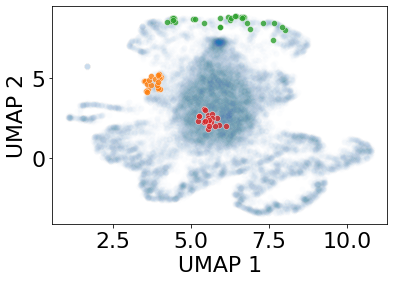

In [50]:
df = pd.concat(multicell_emb)
sns.scatterplot(data=df, x='UMAP 1', y='UMAP 2', alpha=0.01)
df = pd.DataFrame(left_points, columns=['UMAP 2', 'UMAP 1'])
sns.scatterplot(data=df, x='UMAP 1', y='UMAP 2', alpha=0.8)
sns.scatterplot(data=pd.DataFrame(top_points, columns=['UMAP 2', 'UMAP 1']), x='UMAP 1', y='UMAP 2', alpha=0.8)

sns.scatterplot(data=pd.DataFrame(blob_points[:-5], columns=['UMAP 2', 'UMAP 1']), x='UMAP 1', y='UMAP 2', alpha=0.8)




In [91]:
def plot_true_pred(idx, idx_name, cell_line=13):
    fig, axs = plt.subplots(1,2, figsize=[15,5])
    axs[0].plot(filtered_Y[idx,:,cell_line].T);
    axs[1].plot(np.repeat(preds[idx,:,cell_line], 32, axis=1).T);
    pr = []
    for i in idx:
        pr.append(pearsonr(filtered_Y[i,:,cell_line], np.repeat(preds[i,:,cell_line], 32))[0])
    pr = np.round(np.mean(pr),3)

    plt.suptitle('{} points, mean per seq pearson r = {}'.format(idx_name, pr));

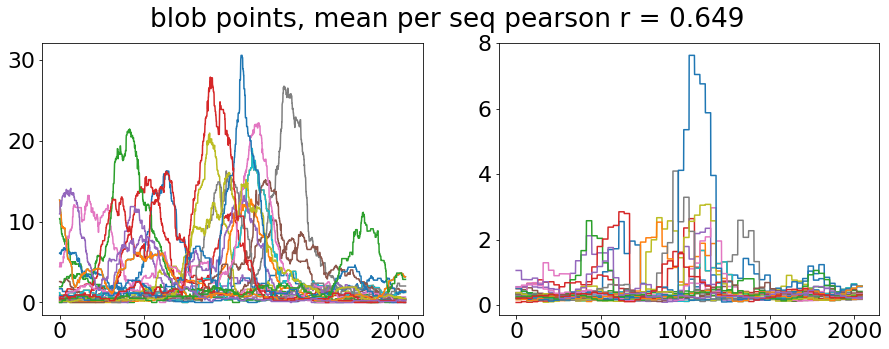

In [95]:
plot_true_pred(blob_idx[:-5], 'blob')

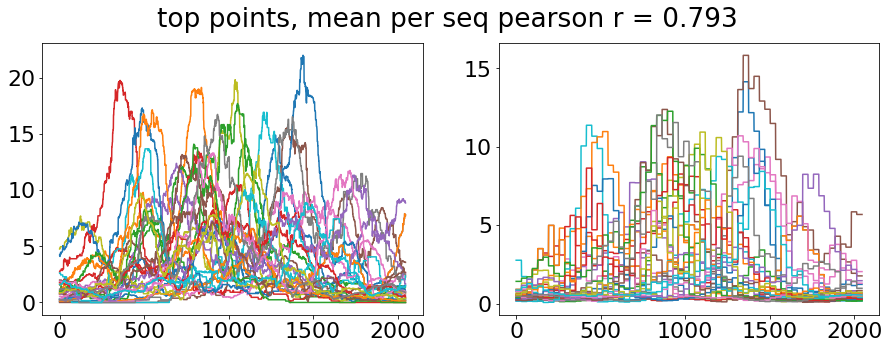

In [93]:
plot_true_pred(top_idx, 'top')

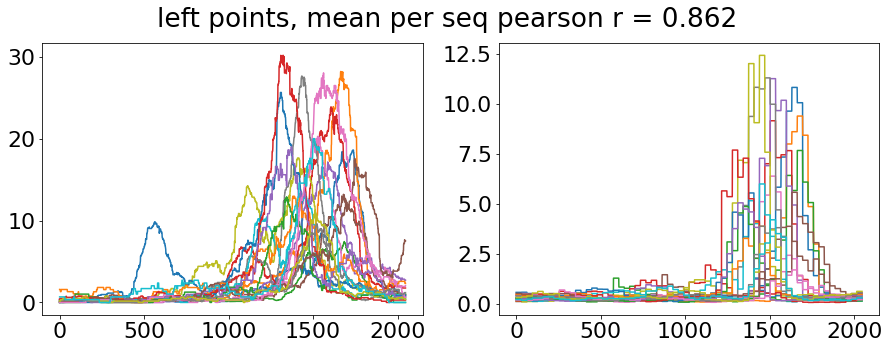

In [94]:
plot_true_pred(left_idx, 'left')

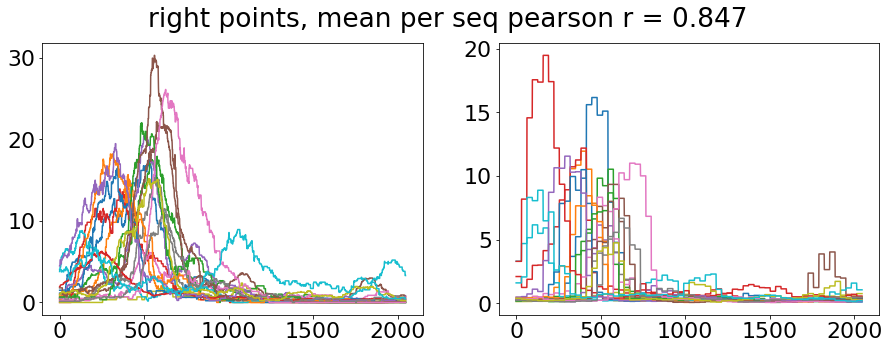

In [96]:
plot_true_pred(right_idx, 'right')

In [111]:
pattern = 'TGACTCA'
pattern_onehot = dna_one_hot(pattern)

In [107]:
blob_idx[9:10]

[19124]

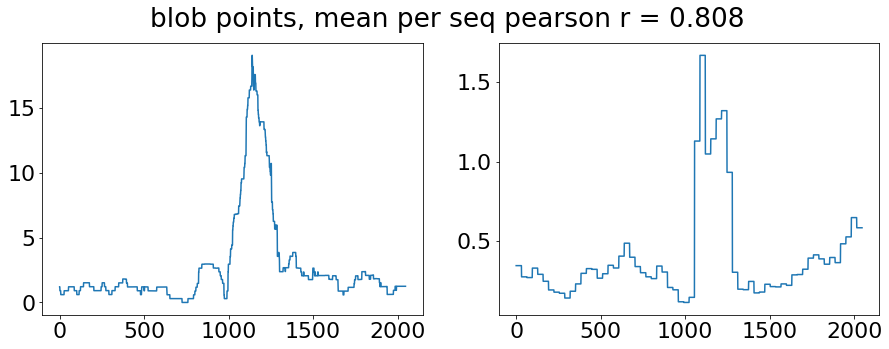

In [105]:
plot_true_pred(blob_idx[9:10], 'blob')

In [110]:
blob_x = filtered_X[19124,:,:].copy()

In [119]:

for i in [400, 1024, 800, 1500]:
    blob_x[i:i+7,:] = pattern_onehot 




In [120]:
blob_modified_pred = model(np.expand_dims(blob_x, axis=0))

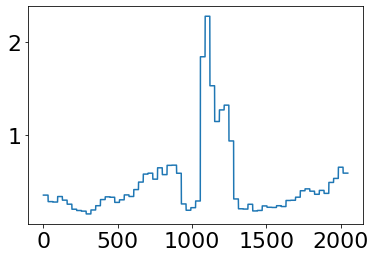

In [121]:
plt.plot(np.repeat(blob_modified_pred[0,:,13], 32))

In [98]:
# run_path_2048 = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_bizon/run-20210708_054512-6o9aiemr' # 2K
# run_path_512 = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_bizon/run-20210707_075709-uagtphvc'
# run_path = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210805_225520-4jmi917g' # base resolution basenji
# run_path = '/mnt/906427d6-fddf-41bf-9ec6-c3d0c37e766f/amber/elzar_wandb/run-20210823_113229-cvwwhn2l' # best bpnet from augmentation
# run_path = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_amber/run-20210804_161352-v3cllxs2' # binned bpnet
# run_path = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_bizon/run-20210706_210747-i6y823ij' 

# testset = util.make_dataset(data_dir, 'test', sts, batch_size=512, shuffle=False)
# targets = pd.read_csv(data_dir+'targets.txt', sep='\t')['identifier'].values
# run_path = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_bizon/run-20210705_124947-5lmwz5d3' # 32


In [91]:
# basset_run = 'basset/run-20210831_022930-hiln8r84/'
# model = tf.keras.models.load_model(basset_run+'files/model-best.h5')